# **Importing Necessary Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.tsa.api as smt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.compat import lzip
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import kstest
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# **Problem Statement**

* Consider only the below columns and prepare a prediction model for predicting Price.

* Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [2]:
df = pd.read_csv("/content/ToyotaCorolla.csv", encoding='latin1')
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


# **Dataset Description :**

* **Attribute Information**

1. Model -- model of the car
2. Price  -- Offer Price in EUROs	
3. Age_08_04 -- Age in months as in August 2004	
4. Mfg_Month -- Manufacturing month (1-12)	
5. Mfg_Year	-- Manufacturing Year
6. KM -- Accumulated Kilometers on odometer
7. Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
8. HP -- Horse Power
9. Met_Color	 -- Metallic Color?  (Yes=1, No=0)
10. Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
11. Automatic	-- Automatic ( (Yes=1, No=0)
12. cc -- Cylinder Volume in cubic centimeters
13. Doors -- Number of doors
14. Cylinders	-- Number of cylinders
15. Gears -- Number of gear positions
16. Quarterly_Tax -- Quarterly road tax in EUROs
17. Weight -- Weight in Kilograms
18. Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
19. BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
20. Guarantee_Period -- 	Guarantee period in months
21. ABS -- Anti-Lock Brake System (Yes=1, No=0)
22. Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
23. Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
24. Airco -- Airconditioning  (Yes=1, No=0)
25. Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
26. Boardcomputer -- Boardcomputer  (Yes=1, No=0)
27. CD_Player -- CD Player  (Yes=1, No=0)
28. Central_Lock -- Central Lock  (Yes=1, No=0)
29. Powered_Windows -- Powered Windows  (Yes=1, No=0)
30. Power_Steering -- Power Steering  (Yes=1, No=0)
31. Radio -- Radio  (Yes=1, No=0)
32. Mistlamps	-- Mistlamps  (Yes=1, No=0)
33. Sport_Model -- Sport Model  (Yes=1, No=0)
34. Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
35. Metallic_Rim --Metallic Rim  (Yes=1, No=0)
36. Radio_cassette -- Radio Cassette  (Yes=1, No=0)
37. Tow_Bar -- Tow Bar  (Yes=1, No=0)

# **Important Columns only**

In [3]:
df = df [['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
df

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


# **Exploratory Data Analysis**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0
Age_08_04,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
cc,1436.0,1576.855850,424.386770,1300.0,1400.0,1600.0,1600.00,16000.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0
Gears,1436.0,5.026462,0.188510,3.0,5.0,5.0,5.00,6.0
Quarterly_Tax,1436.0,87.122563,41.128611,19.0,69.0,85.0,85.00,283.0
Weight,1436.0,1072.459610,52.641120,1000.0,1040.0,1070.0,1085.00,1615.0


In [6]:
df.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [7]:
df.agg(["skew","kurt"])

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
skew,1.703885,-0.826702,1.015912,0.955836,27.431793,-0.076395,2.283960,1.993834,3.108639
kurt,3.737781,-0.076632,1.685057,8.836434,930.711227,-1.874765,37.703476,4.298345,19.362901


In [8]:
for i in df.columns :
    print(i , '\n', df[i].value_counts(),'\n\n')

Price 
 8950     109
9950      84
7950      63
10950     62
11950     47
        ... 
11790      1
4750       1
4350       1
21125      1
10845      1
Name: Price, Length: 236, dtype: int64 


Age_08_04 
 68    69
65    63
80    59
78    47
62    42
      ..
2      2
1      2
10     1
18     1
6      1
Name: Age_08_04, Length: 77, dtype: int64 


KM 
 36000    9
1        8
43000    7
59000    7
75000    6
        ..
63792    1
64193    1
65170    1
65471    1
16916    1
Name: KM, Length: 1263, dtype: int64 


HP 
 110    835
86     249
97     164
72      73
90      36
69      34
107     21
192     11
116      9
98       2
71       1
73       1
Name: HP, dtype: int64 


cc 
 1600     845
1300     248
1400     164
2000     119
1900      30
1800      14
1598       4
1587       4
1995       2
1398       2
1332       2
16000      1
1975       1
Name: cc, dtype: int64 


Doors 
 5    674
3    622
4    138
2      2
Name: Doors, dtype: int64 


Gears 
 5    1390
6      43
3       2
4       1
N

In [9]:
for i in df.columns:
    print(i , "\n" , df[i].unique())

Price 
 [13500 13750 13950 14950 12950 16900 18600 21500 20950 19950 19600 22500
 22000 22750 17950 16750 16950 15950 16250 17495 15750 15500 14750 19000
 15800 21950 20500 13250 15250 18950 15999 16500 18750 22250 12995 18450
 16895 14900 17250 15450 16650 17450 16450 18900 18990 18500 19450 18800
 32500 31000 31275 24950 22950 24990 17900 19250 16350 21750 15850 23000
 19900 23950 24500 17200 19500 16868 19750 20750 17650 17795 18245 23750
 18700 21125  6950  9500 11950  7750  4350  4750 11750 11900  9950 11495
 11250 10500 10450 11500 12500 10950 11450 11790 12450 11690 12750 11925
 12900 11650 10850  9940 13450 12495 12000 11480 14990 12850 11700 11895
 13875 12295 13995  9900 11990 10750 11695 11000 12400 12200 12695 14350
 10250  6500  6400  7000  8900  8500  8950  9250  9450  8250  4450  9000
  5150  7900 10900  9750 11290 10895 10995  9850  8695 10990  8750  9930
  9799  9700  9990  9475 10000 10495  9400  9650  9550 13000 11710  9980
 12250 11930 10800 10600  7500  5950  6900 

In [10]:
# find categorical and numeric variables

categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n', categorical)
print('\n')
numeric = [var for var in df.columns if df[var].dtype!='O']
print('There are {} Numeric variables\n'.format(len(numeric)))
print('The Numeric variables are :\n', numeric)

There are 0 categorical variables

The categorical variables are :
 []


There are 9 Numeric variables

The Numeric variables are :
 ['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight']


## **Visualization**

Skew: 1.7038849799952995
Kurtosis: 3.737781189982718


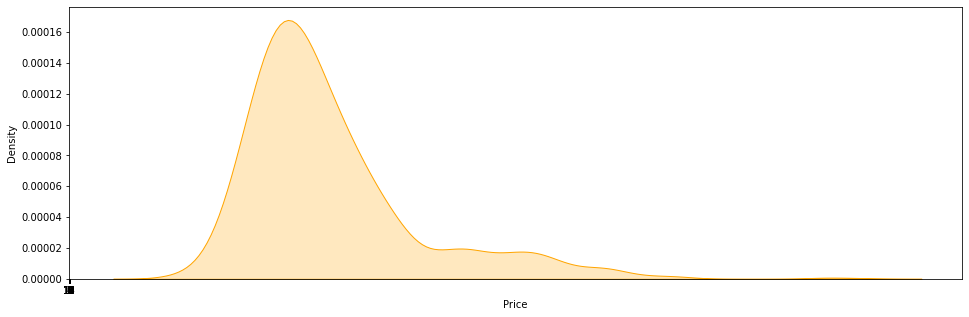

Skew: -0.82670187309842
Kurtosis: -0.0766324777459908


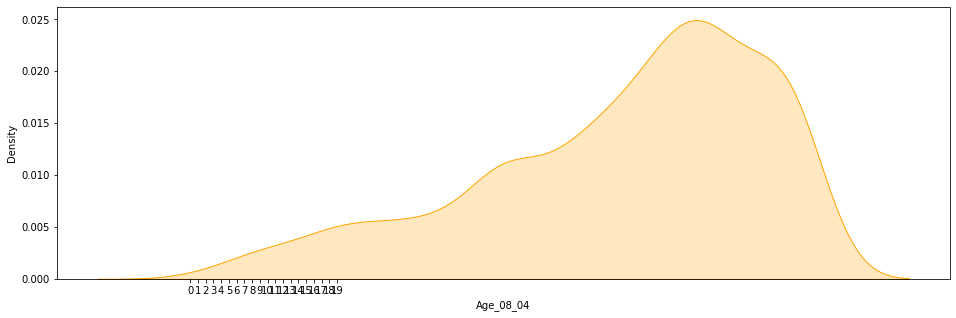

Skew: 1.0159121980877577
Kurtosis: 1.6850567186709635


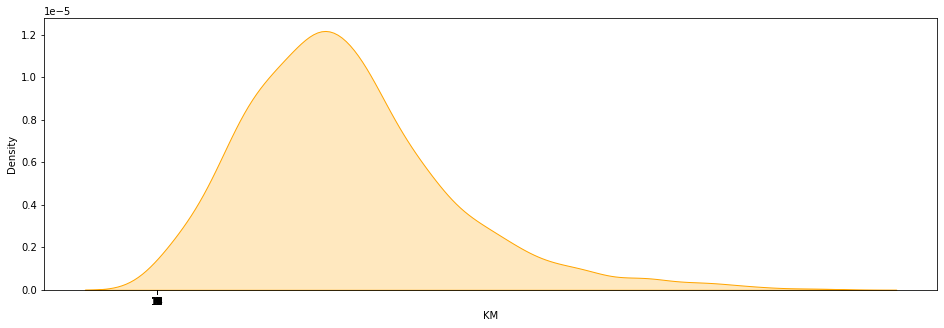

Skew: 0.9558356472519488
Kurtosis: 8.836433875040042


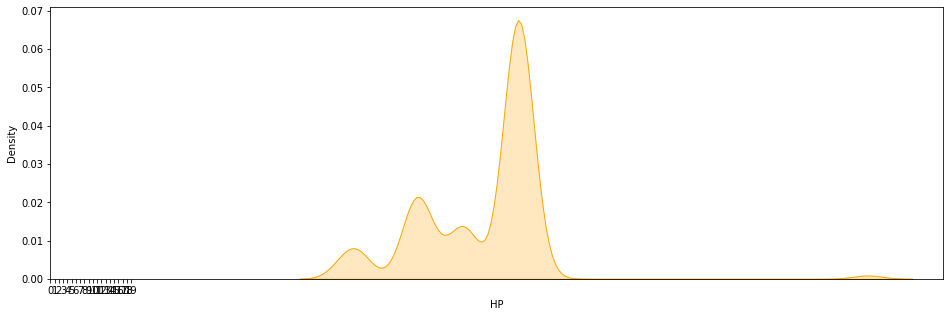

Skew: 27.431792795981686
Kurtosis: 930.7112265066064


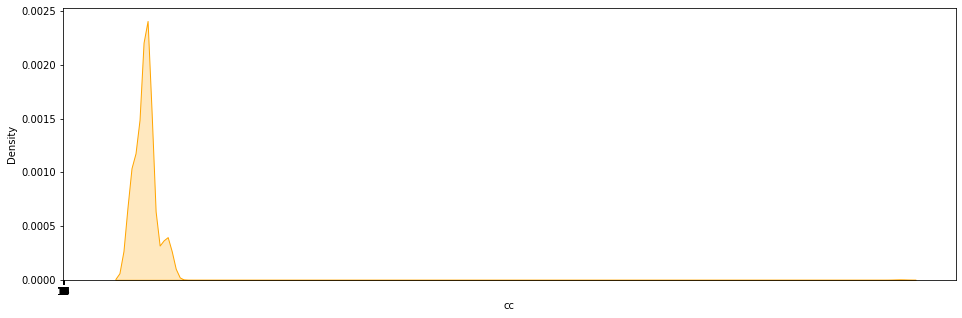

Skew: -0.07639499290452467
Kurtosis: -1.8747649199236034


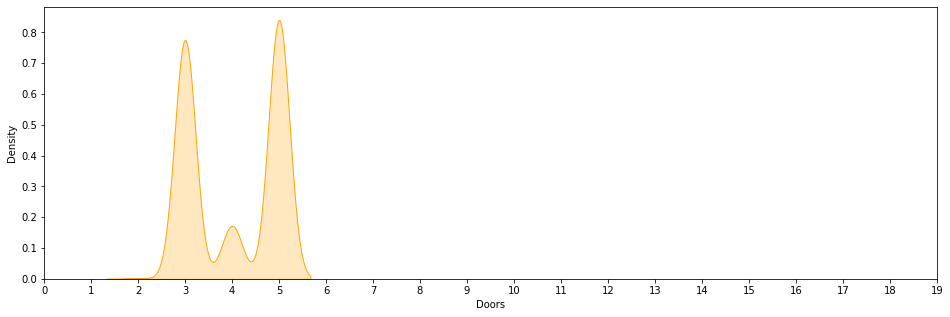

Skew: 2.283959738160194
Kurtosis: 37.703476140899774


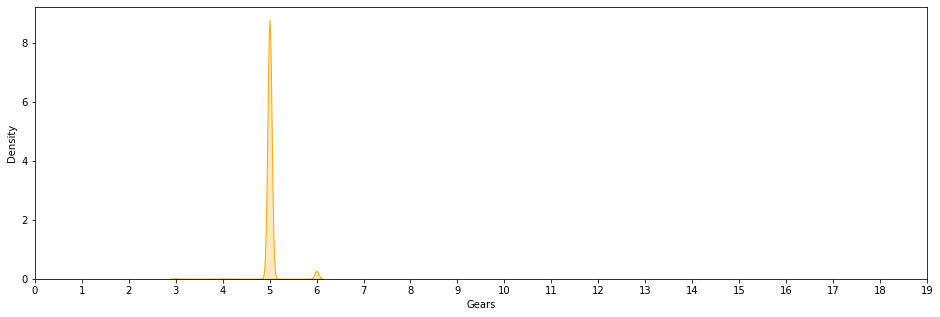

Skew: 1.993833864547599
Kurtosis: 4.298345182670394


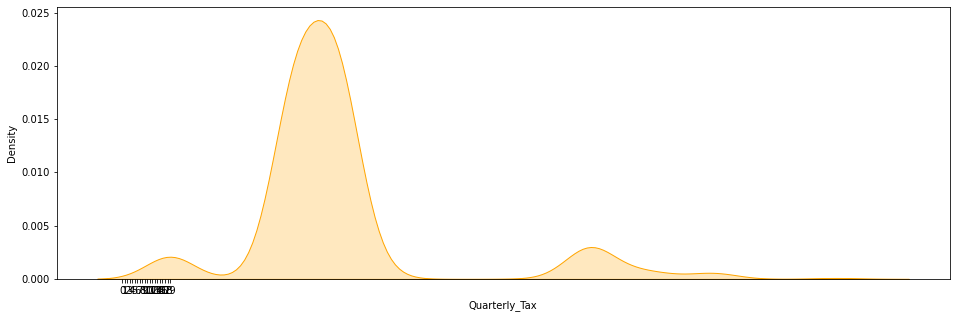

Skew: 3.108639394626062
Kurtosis: 19.362901418637517


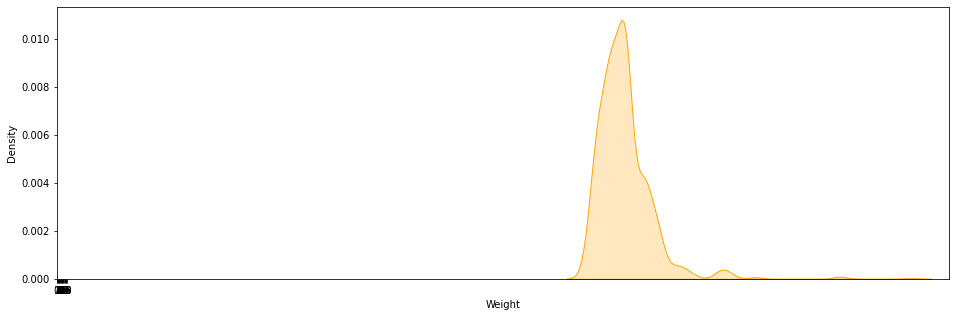

In [11]:
for i in numeric:
  plt.figure(figsize=(16,5))
  print("Skew: {}".format(df[i].skew()))
  print("Kurtosis: {}".format(df[i].kurtosis()))
  ax = sns.kdeplot(df[i],shade=True,color='Orange')
  plt.xticks([i for i in range(0,20,1)])
  plt.show()


<Figure size 360x360 with 0 Axes>

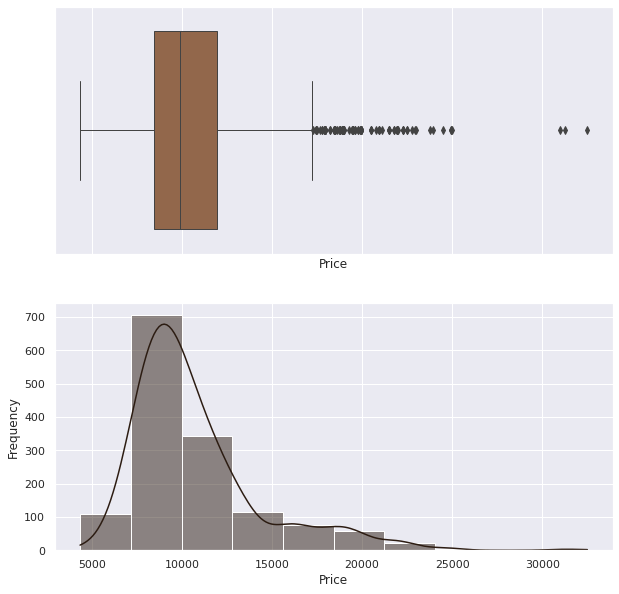

<Figure size 360x360 with 0 Axes>

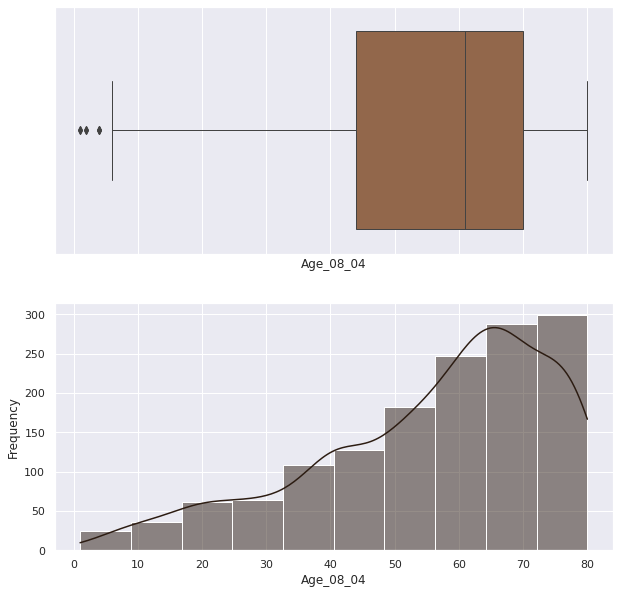

<Figure size 360x360 with 0 Axes>

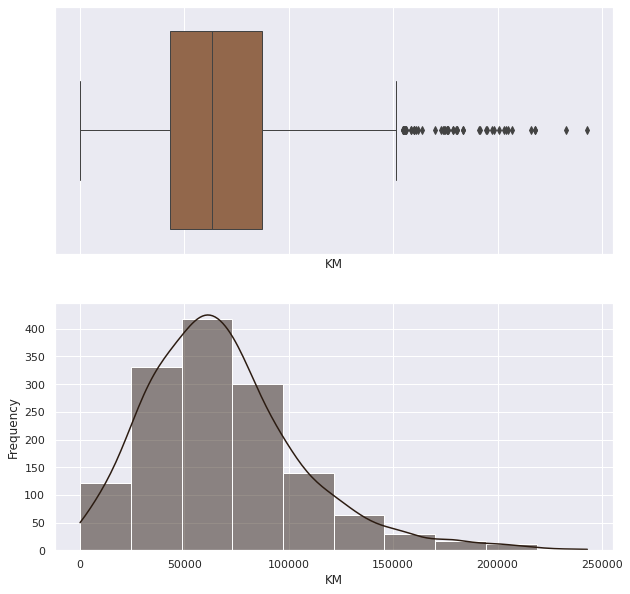

<Figure size 360x360 with 0 Axes>

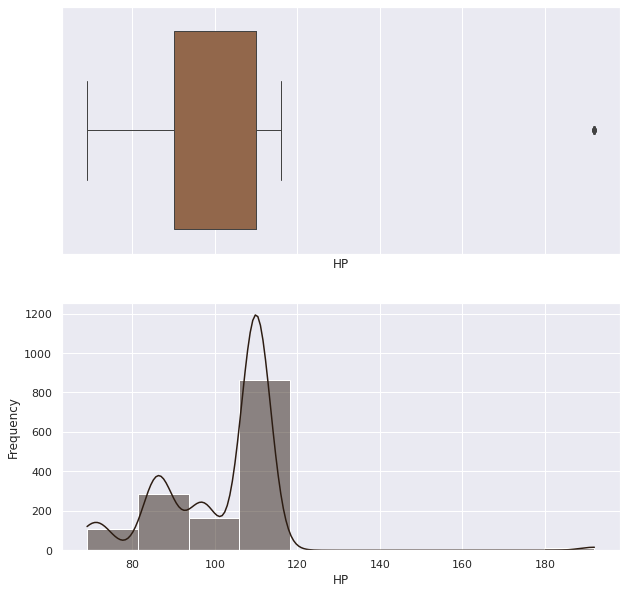

<Figure size 360x360 with 0 Axes>

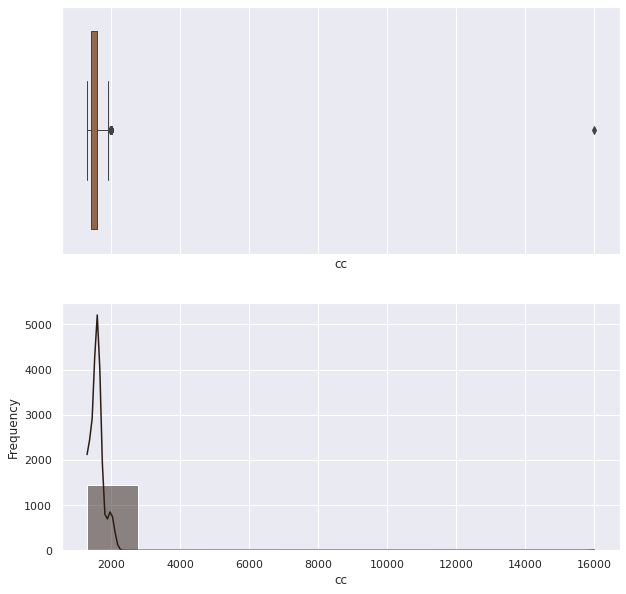

<Figure size 360x360 with 0 Axes>

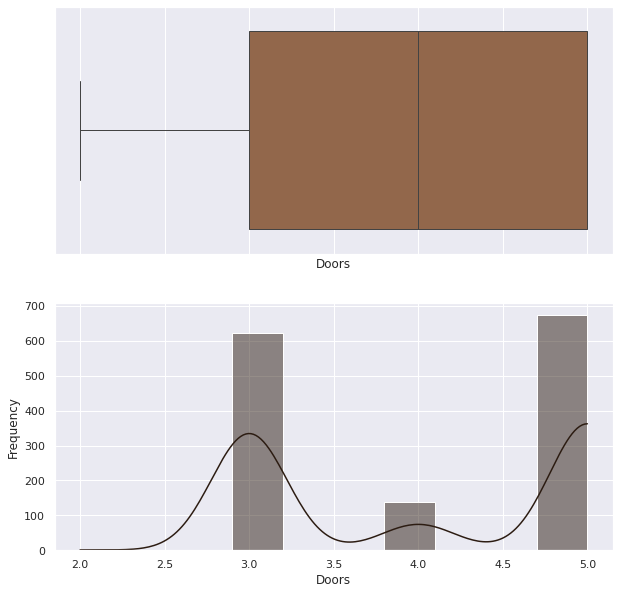

<Figure size 360x360 with 0 Axes>

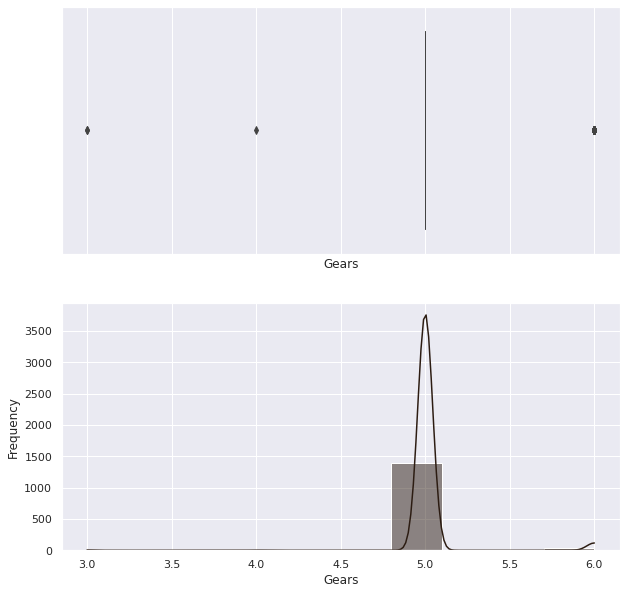

<Figure size 360x360 with 0 Axes>

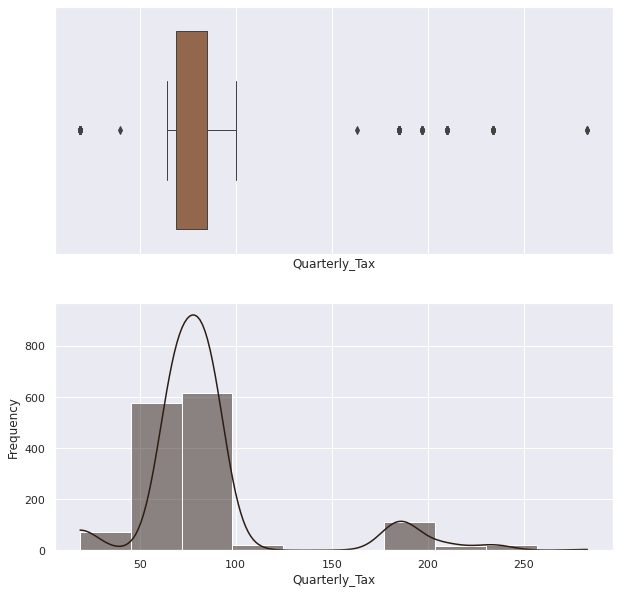

<Figure size 360x360 with 0 Axes>

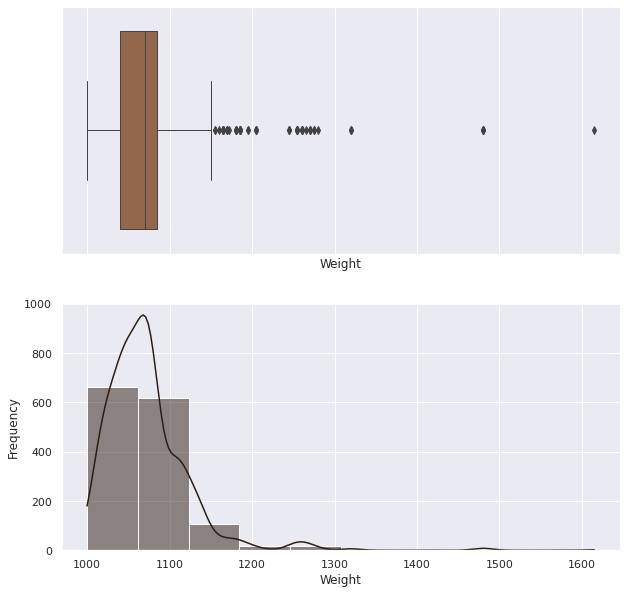

In [12]:
for i in numeric:
    plt.figure(figsize=(5,5))
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(10, 10)}, palette="copper")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], ax=ax_box , linewidth= 1.0, palette="copper")
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True, palette="copper")

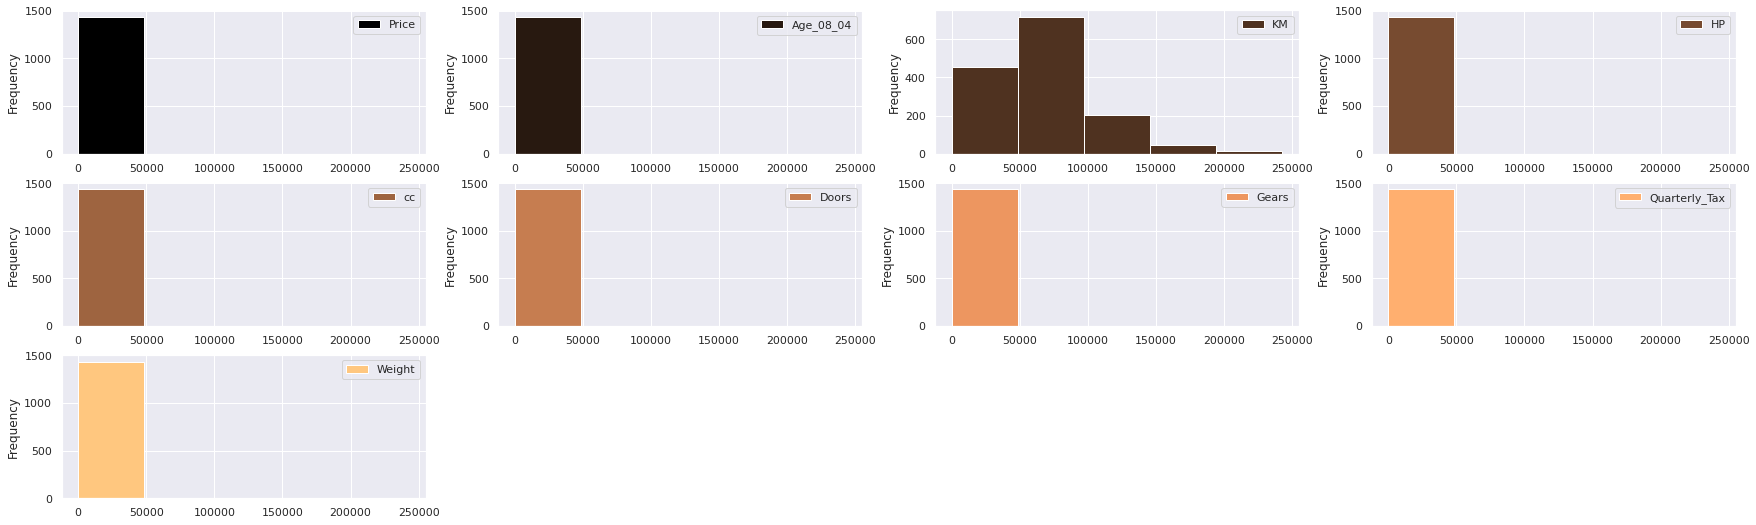

In [13]:
plt.rcParams['figure.figsize']=(30,28)
df.plot(kind='hist', bins=5, subplots=True,  cmap="copper",layout=(9,4), sharex=False, sharey=False)
plt.show()

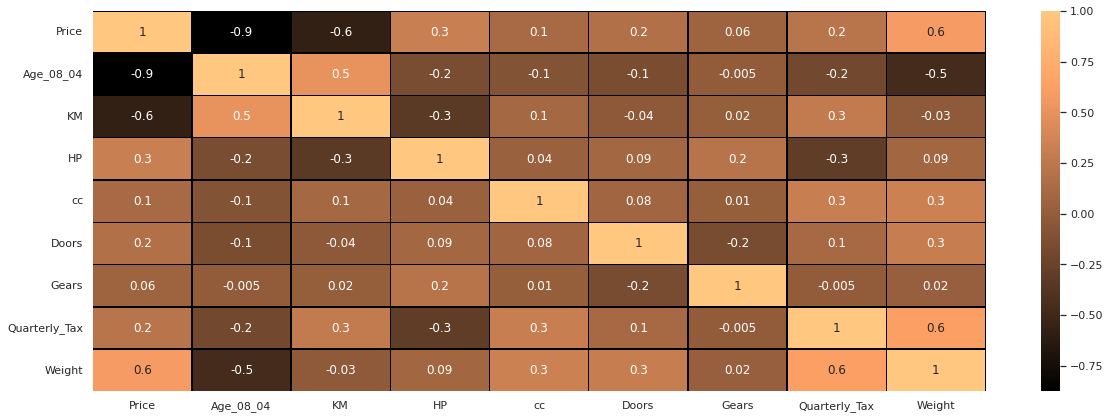

In [14]:
plt.figure(figsize=(20,7))
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="copper", annot=True, linecolor='black', linewidths=0.5, fmt='.1g')
  
# displaying heatmap
plt.show()

# **Pre-Processing**

## **Duplicate Rows**

In [15]:
df.shape

(1436, 9)

In [16]:
df[df.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [17]:
df=df.drop_duplicates().reset_index(drop=True)


In [18]:
df.shape

(1435, 9)

# **Multiple Linear Regression**

## **Scalling Features**

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data=pd.DataFrame(scaler.fit_transform(df),columns=df.columns, index=df.index)
data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.770368,-1.777268,-0.575958,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
1,0.839669,-1.777268,0.116474,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
2,0.895109,-1.723380,-0.716707,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
3,1.172311,-1.615603,-0.548902,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
4,0.839669,-1.400049,-0.802384,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.870688
...,...,...,...,...,...,...,...,...,...
1430,-0.892845,0.701602,-1.281492,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-0.905299
1431,0.034396,0.863267,-1.322689,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-1.096747
1432,-0.615643,0.809379,-1.375627,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-1.096747
1433,-0.962145,0.755490,-1.378295,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-1.096747


In [20]:
model1 = smf.ols('Price~Age_08_04+KM+cc+HP+Doors+Gears+Quarterly_Tax+Weight', data=data).fit() #model fitting
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        10:12:24   Log-Likelihood:                -612.46
No. Observations:                1435   AIC:                             1243.
Df Residuals:                    1426   BIC:                             1290.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.003e-16      0.010   3.06e-14      1.000      -0.019       0.019
Age_08_04        -0.6261      0.013    -46.552      0.000      -0.652      -0.600
KM               -0.2154      0.013    -16.552      0.000      -0.241      -0.190
cc               -0.0139      0.011     -1.316      0.188      -0.035       0.007
HP                0.1311      0.012     11.210      0.000       0.108       0.154
Doors            -0.0002      0.011     -0.023      0.982      -0.021       0.020
Gears             0.0312      0.010      3.035      0.002       0.011       0.051
Quarterly_Tax     0.0438      0.015      2.944      0.003       0.015       0.073
Weight            0.2441      0.015     15.761      0.000       0.214       0.274
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                         3.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **Hypothesis Testing:**

### **Significancy of the regression coefficients**

>H0 : The regression coefficients are insignificant

>H1 : The regression coefficients are significant

In [21]:
round(model1.pvalues,4)

Intercept        1.0000
Age_08_04        0.0000
KM               0.0000
cc               0.1882
HP               0.0000
Doors            0.9816
Gears            0.0025
Quarterly_Tax    0.0033
Weight           0.0000
dtype: float64

#### Conclusion:
The p-value for cc and Doors are greater than 0.05, hence, we do not reject H0 for these variables and conclude that the regression coefficients are insignificant.



### **Significancy of the model :**

>H0 : The model is insignificant

>H1 : The model is significant

In [22]:
round(model1.f_pvalue,4)

0.0

#### Conclusion:
The p-value for the F-test to check the significancy of the model is less than 0.05, hence we reject H0 and conclude that the model is significant.

## **Checking the Assumptions of the linear regressioin**

### **1. Linearity**

Indiviadual Comparison 




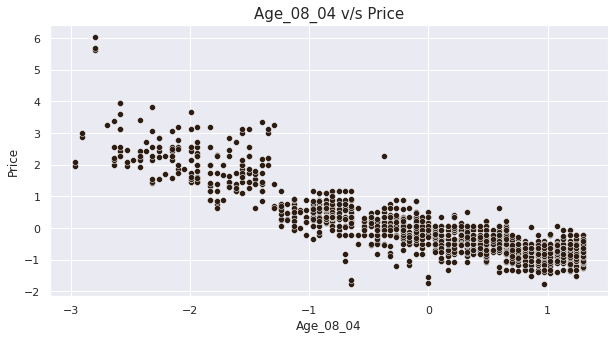

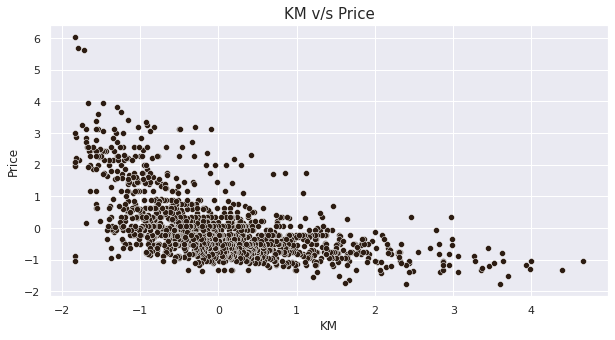

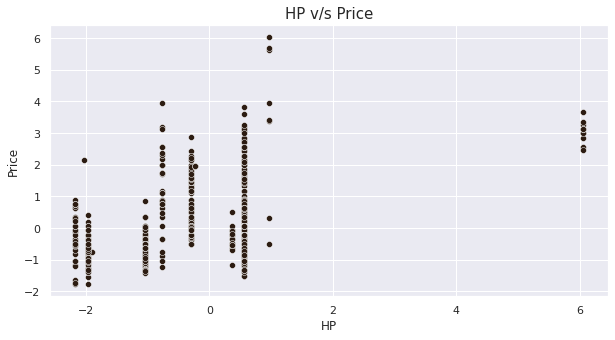

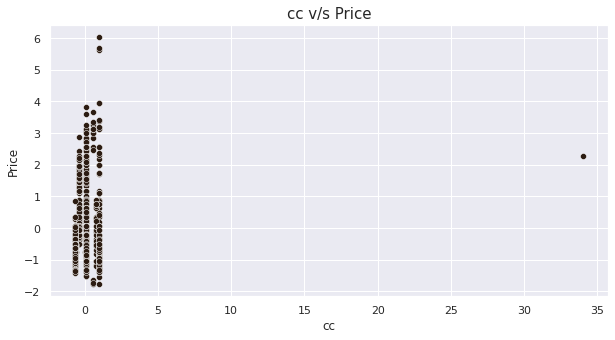

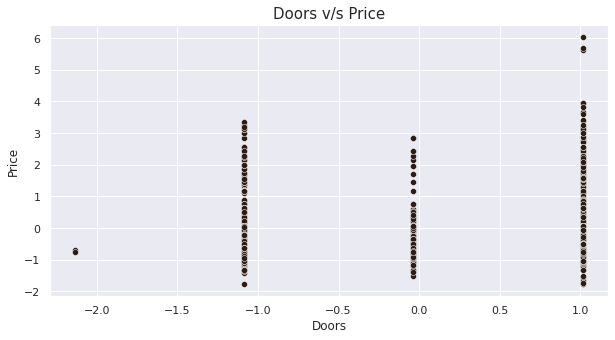

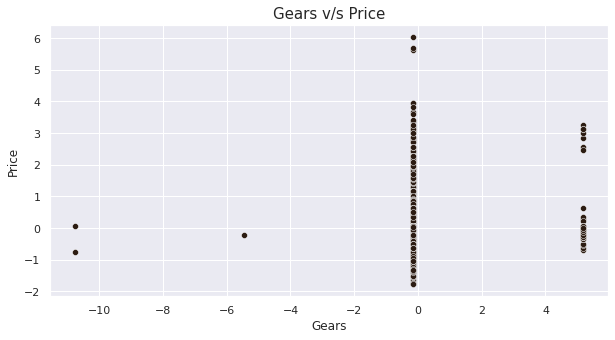

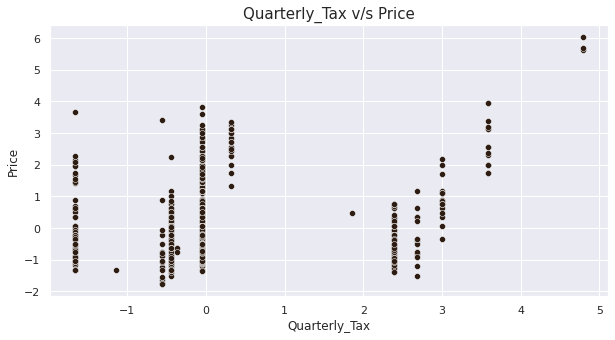

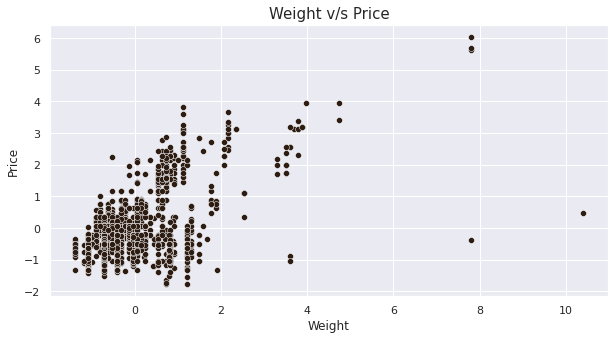

In [23]:
names = data.drop(['Price'], axis=1).columns
print("Indiviadual Comparison \n\n")
for i in names:
    #numeric.remove("Price")
    plt.figure(figsize=(10,5))
    sns.scatterplot(data=data, x=i, y="Price")
    plt.title(label=f'{i} v/s Price', size=15)
    plt.show()

#### **Conclusion:**

1. there exists perfect liner negative co-relationship between price and age.
2. there exists a-kind of negative co-relationship between price and KM.

### **2. Testing Multicollinearity**

#### **(a)Pair plot**

We shall see if there is correlation between the variables, by using pairplot.

In [24]:
# We shall remove the output variable
data1 = data.drop(["Price"], axis=1)

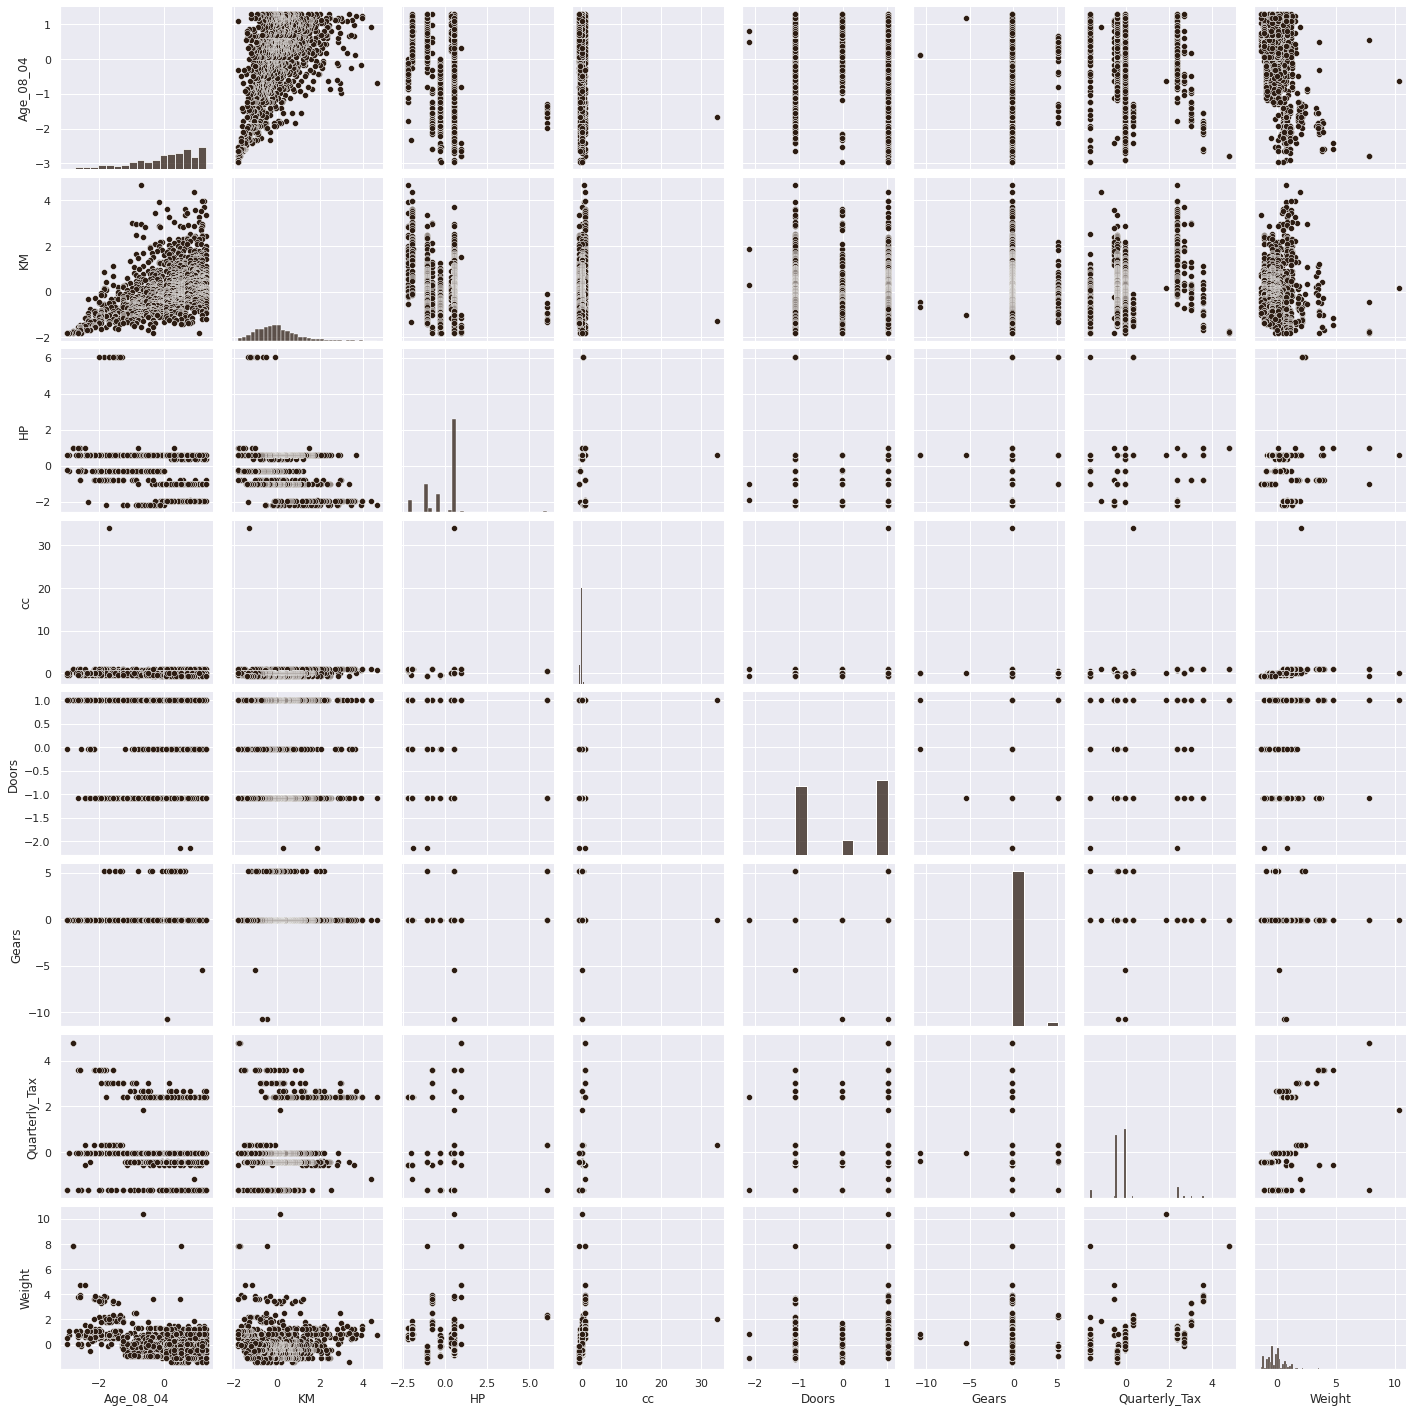

In [25]:
sns.pairplot(data = data1)  

1. The visualiztion shows that there is some correaltion among KM, price and age


#### **(b) Correlation**

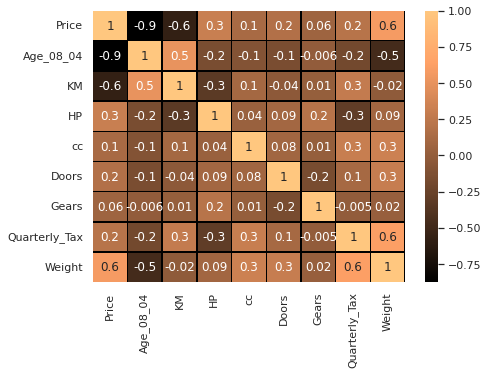

In [26]:
plt.figure(figsize=(7,5))
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="copper", annot=True, linecolor='black', linewidths=0.5, fmt='.1g')
  
# displaying heatmap
plt.show()

* Price and Age of car , Price and KM , Price and Weights gives us a hint of possible collinearity, but to validate the results we shall use VIF.

#### **(c) Variance Inflation Factor**

In [27]:
X = data[['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears','Quarterly_Tax', 'Weight']]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values('VIF Factor',ascending=False)

,VIF Factor,features
0,7.273787,Price
1,4.727532,Age_08_04
8,2.920428,Weight
7,2.309328,Quarterly_Tax
2,2.094791,KM
3,1.544237,HP
4,1.164884,cc
5,1.155890,Doors
6,1.105939,Gears


#### **Conclusion:**
Here all the values of VIF are less than 10, hence we shall conclude that all the explanatory variables are independent and there exists no multicollinearity.

### **3. Normality of the errors**

#### **(a) Q-Q Plot**

We shall use the Q-Q plot to check if the error terms follow normal distribution or not.

<Figure size 720x360 with 0 Axes>

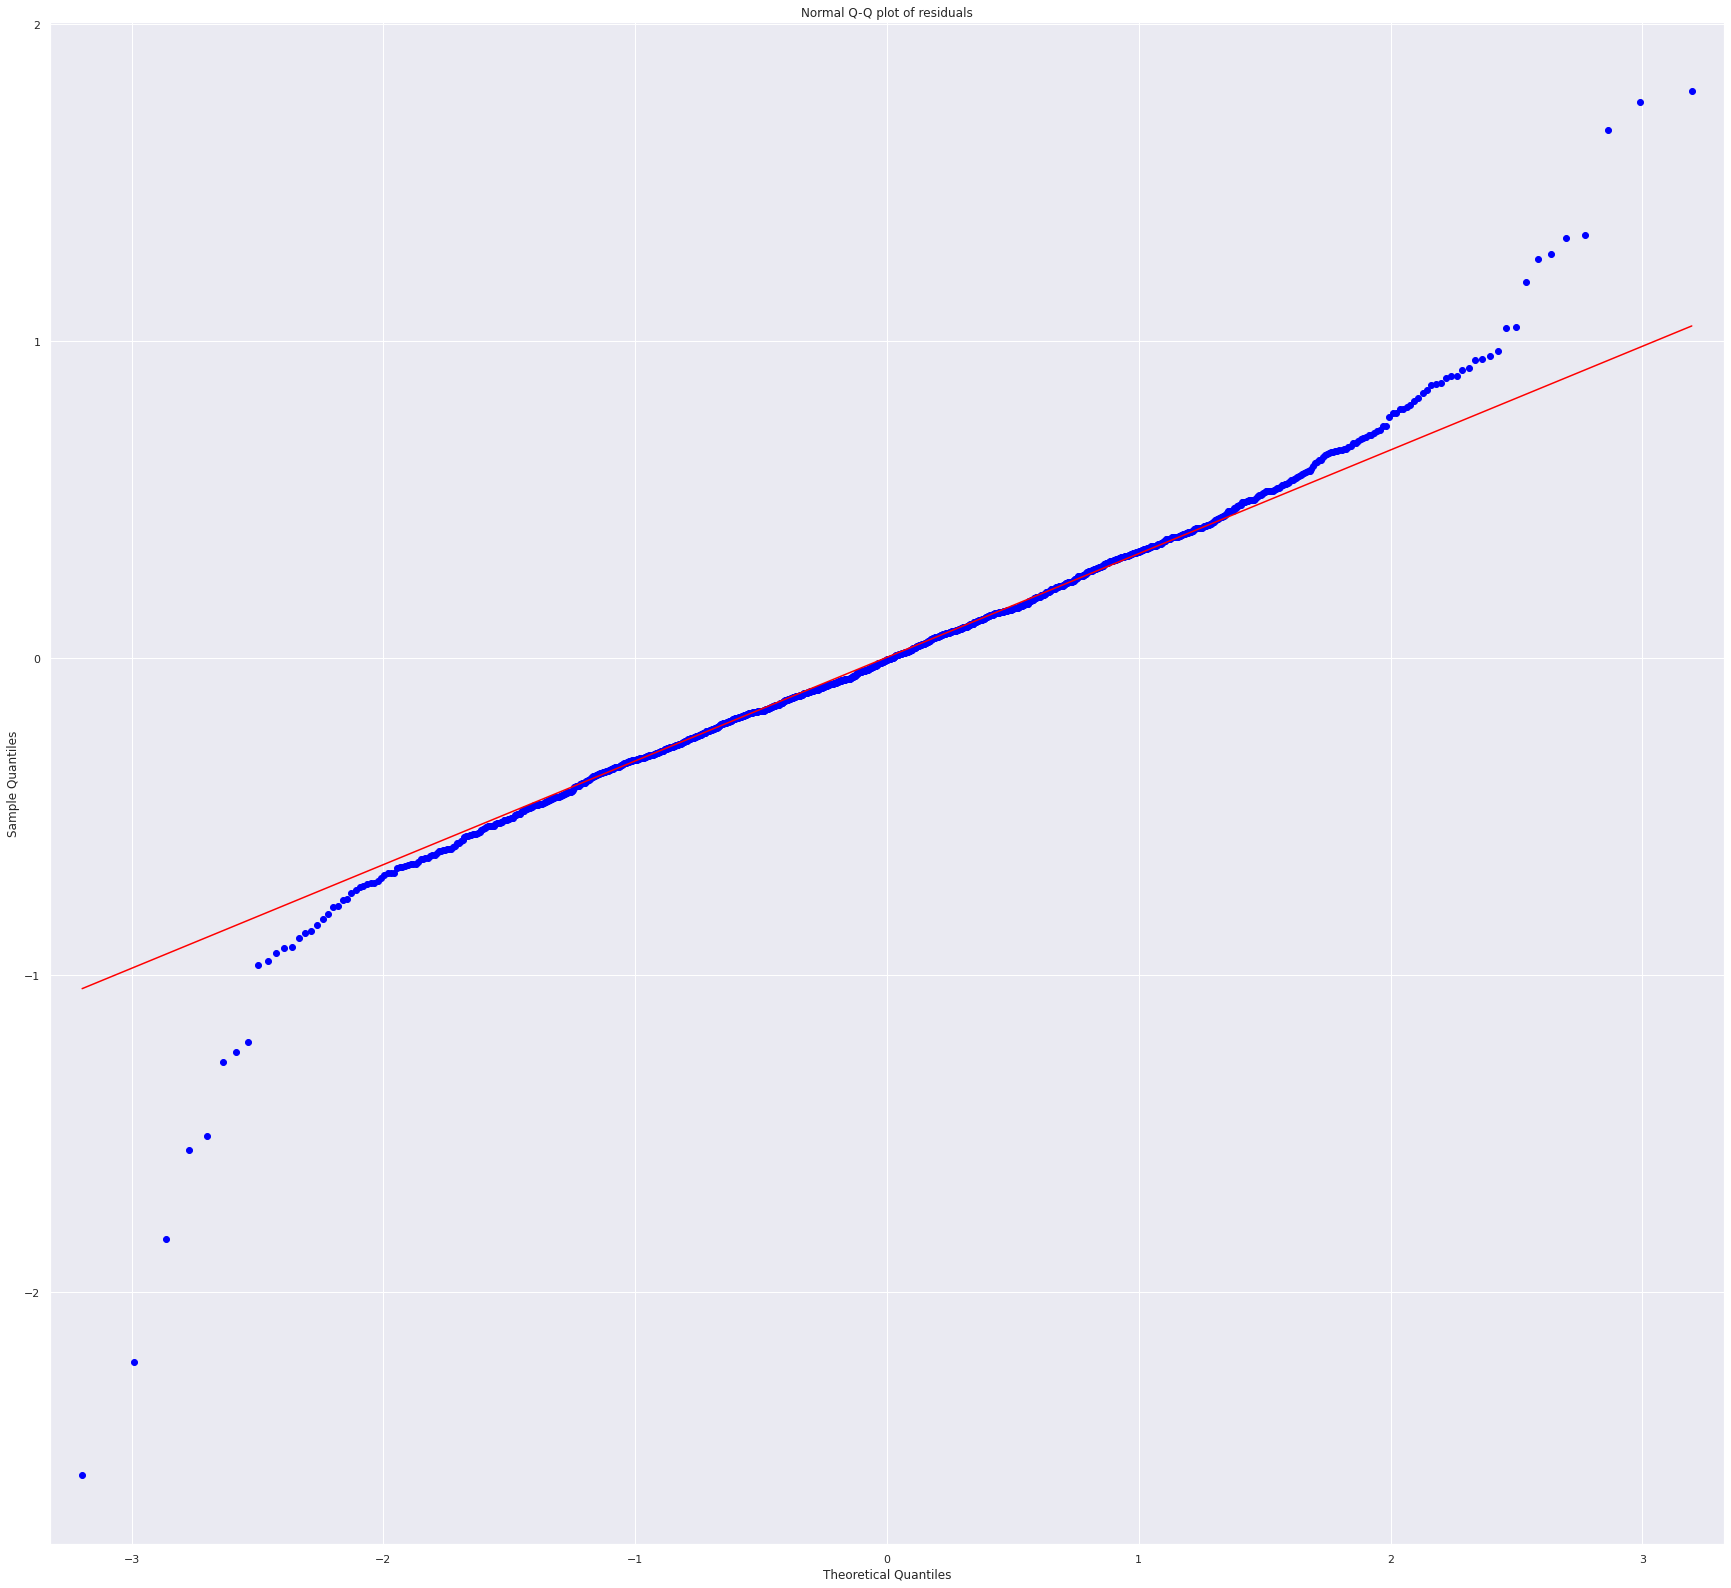

In [28]:
plt.figure(figsize=(10,5))
qqplot=sm.qqplot(model1.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

Here, majority of the data points lie near the line, and hence we can conclude that the errors follow normal distribution. But to validate our result, we shall use Shapiro-Wilk Test to check the normality of the errors.

#### **(b) Kolmogrov-Smirnov Test**

##### **Hypothesis :**

>H0 : Error terms are distributed normally

>H1 : Error terms are not distributed normally

In [29]:
#for large dataset
# from scipy.stats import shapiro
# shapiro(model1.resid)

In [30]:
print(kstest(model1.resid, 'norm'),'\n')
print(round(kstest(model1.resid, 'norm')[1],4))

KstestResult(statistic=0.24222975316772033, pvalue=1.3252312787617576e-74) 

0.0


#### **Conclusion:**
The p-value is less than 0.05, hence reject H0 and conclude that the error terms are not distributed normally.

### **4. Testing Homoscedasticity**

#### **(a) Predicted v/s Residual Plot**

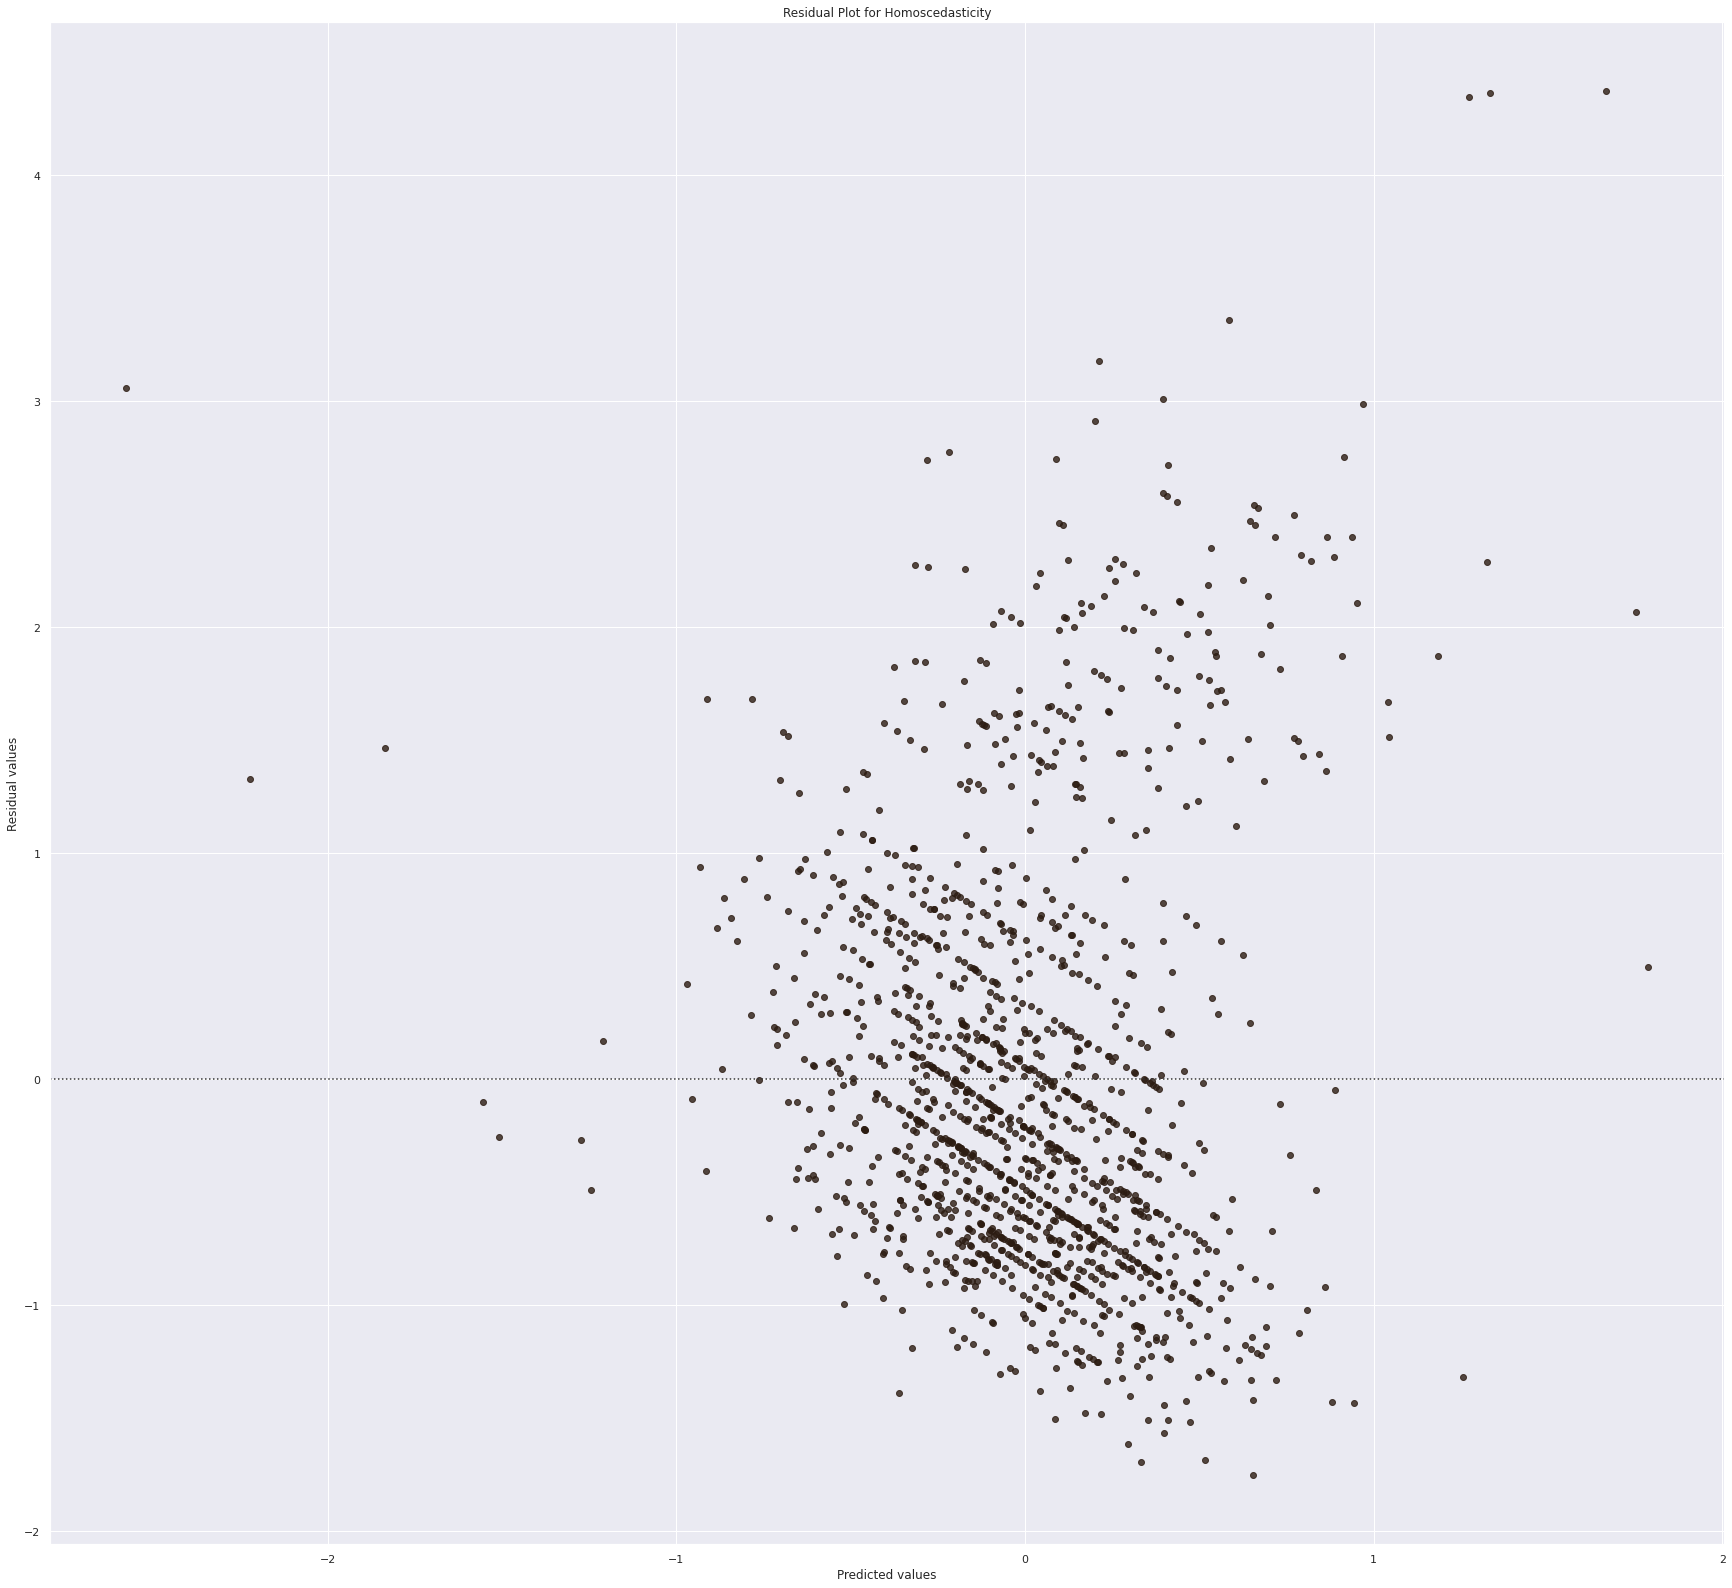

In [31]:
preds = model1.fittedvalues.copy()
true = data["Price"].values.copy()
resid = true-preds
sns.residplot(resid,preds)
plt.title('Residual Plot for Homoscedasticity')
plt.xlabel('Predicted values')
plt.ylabel('Residual values')
plt.show()

Here the distribution seems to be random, and hence we can say that there exist homoscedasticity, but to validate our result, we shall use Breush-Pagan Test.

#### **(b) Breush-Pagan Test**

##### **Hypothesis :**

>H0 : the residuals are Homoscedastic

>H1 : the residuals are Hetroscedastic

In [32]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
test_result = sms.het_breuschpagan(model1.resid, model1.model.exog)
lzip(names, test_result)

[('Lagrange multiplier statistic', 429.4636141616737),
 ('p-value', 9.263614413231173e-88),
 ('f-value', 76.13040194512328),
 ('f p-value', 1.234490954600633e-104)]

##### **Conclusion :**
* The p-value for BP test is 0.0000 less than 0.05 ,so we may conclude that the residuals are hetroscedastic.
* so, there is problem of Hetroscedasticity

### **5. Testing Autocorrelation**

#### **(a) residual plot**

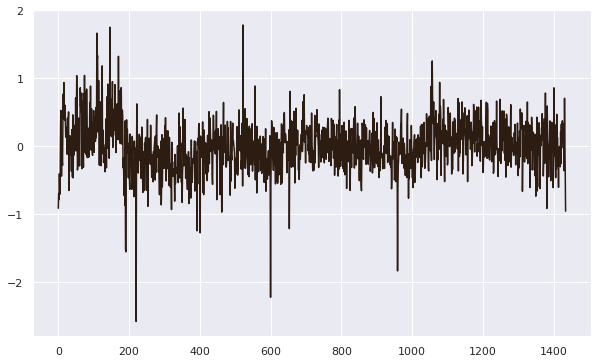

In [33]:
plt.figure(figsize=(10,6))
plt.plot(model1.resid.index, model1.resid)

The plot shows that the data points are spread randomly, but some datapoints are concentrated, hence we are not able to conclude anything. Hence we shall use ACF and PACF plots

#### **(b) ACF and PACF plot**

<Figure size 720x360 with 0 Axes>

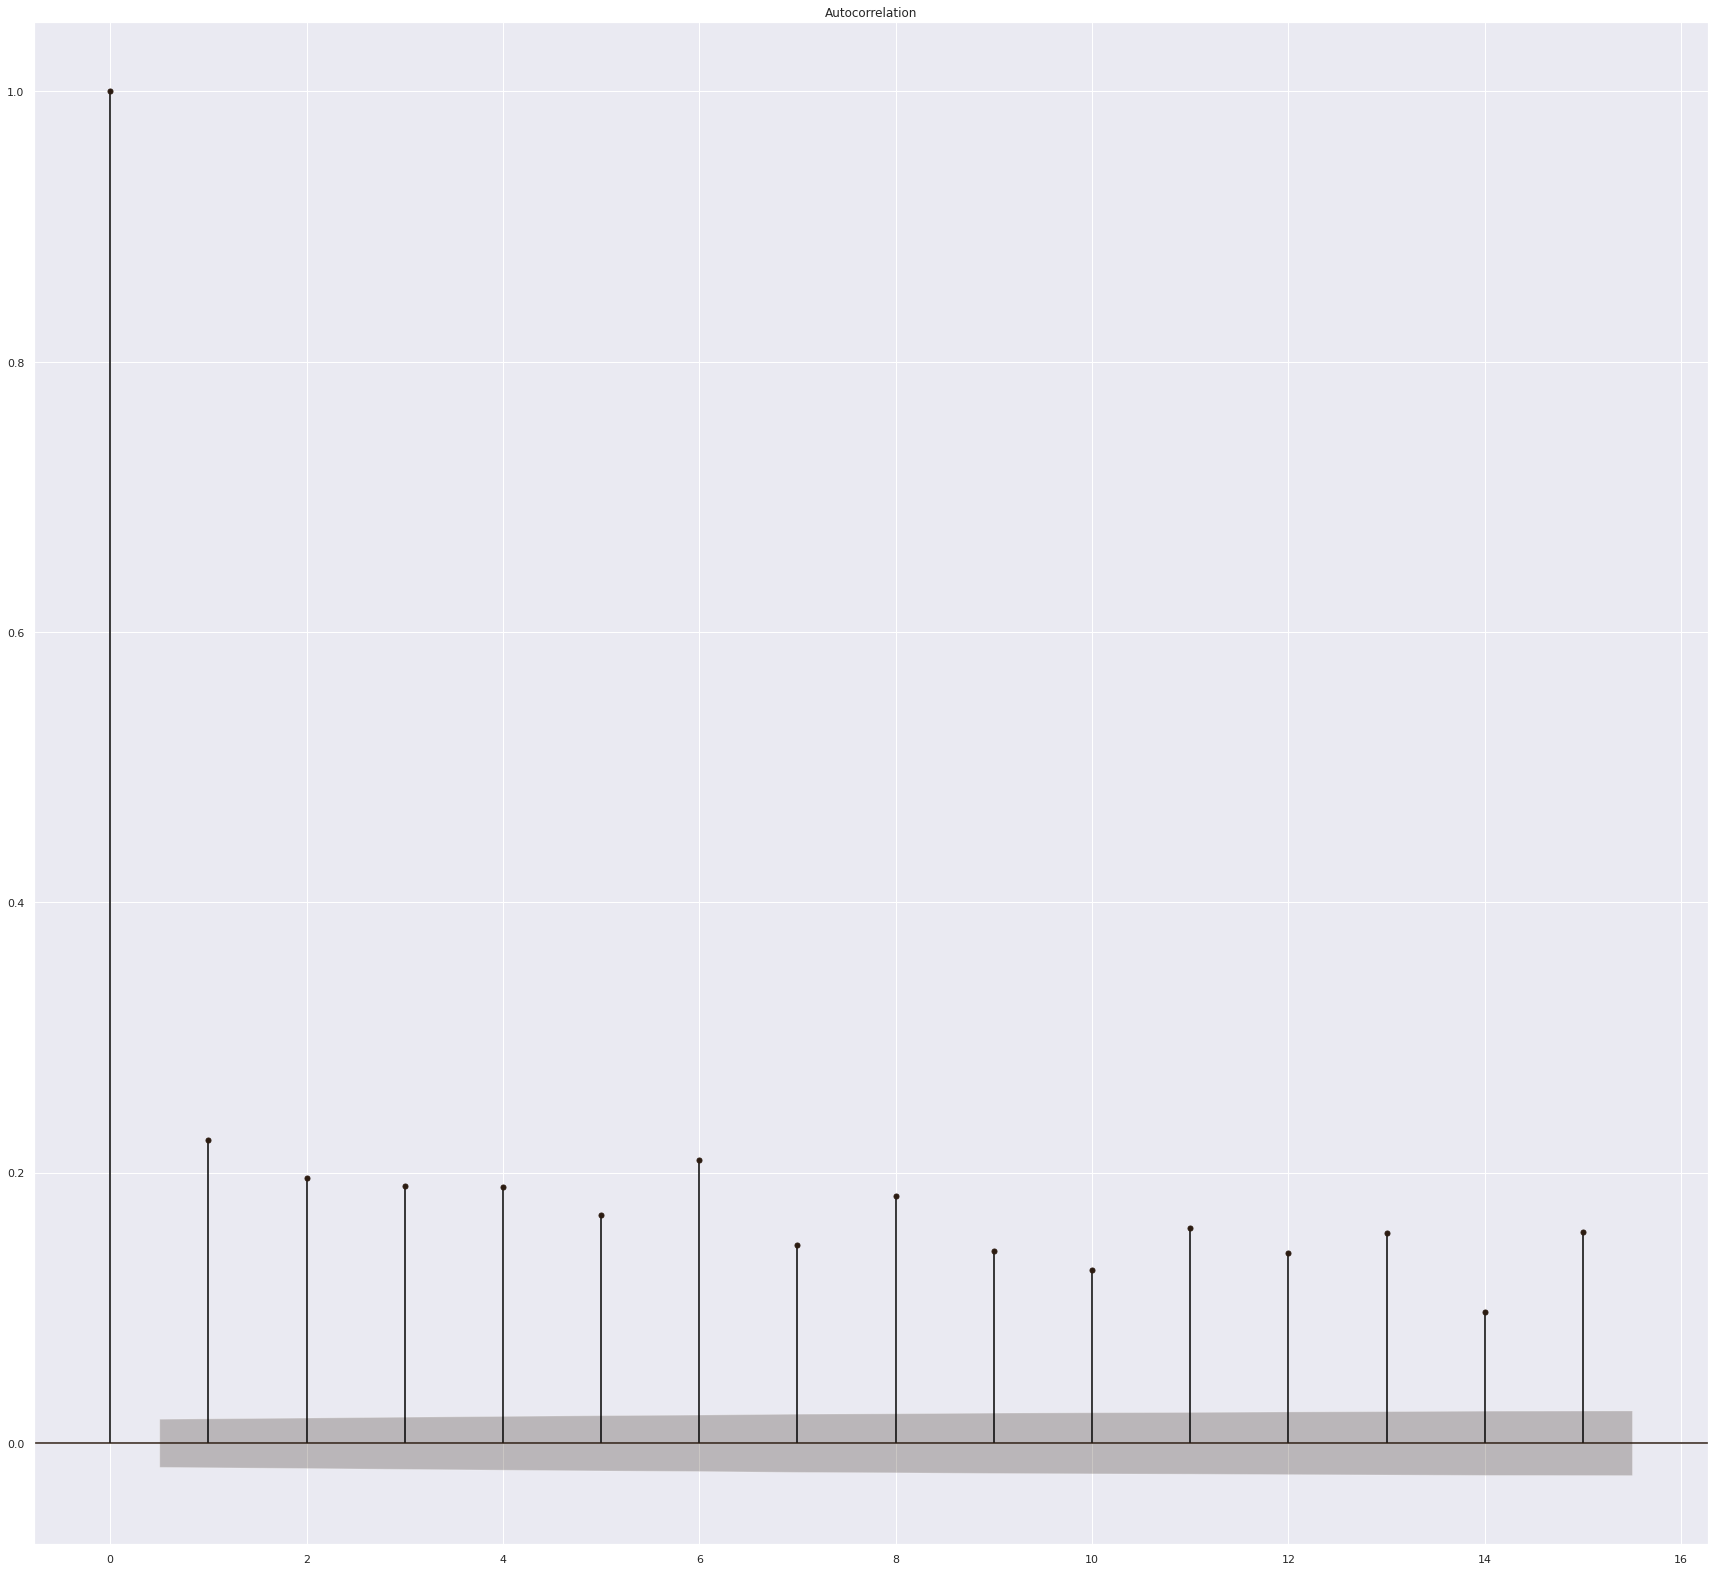

In [34]:
plt.figure(figsize=(10,5))
acf = smt.graphics.plot_acf(model1.resid, lags=15, alpha=0.5)
acf.show()


<Figure size 720x288 with 0 Axes>

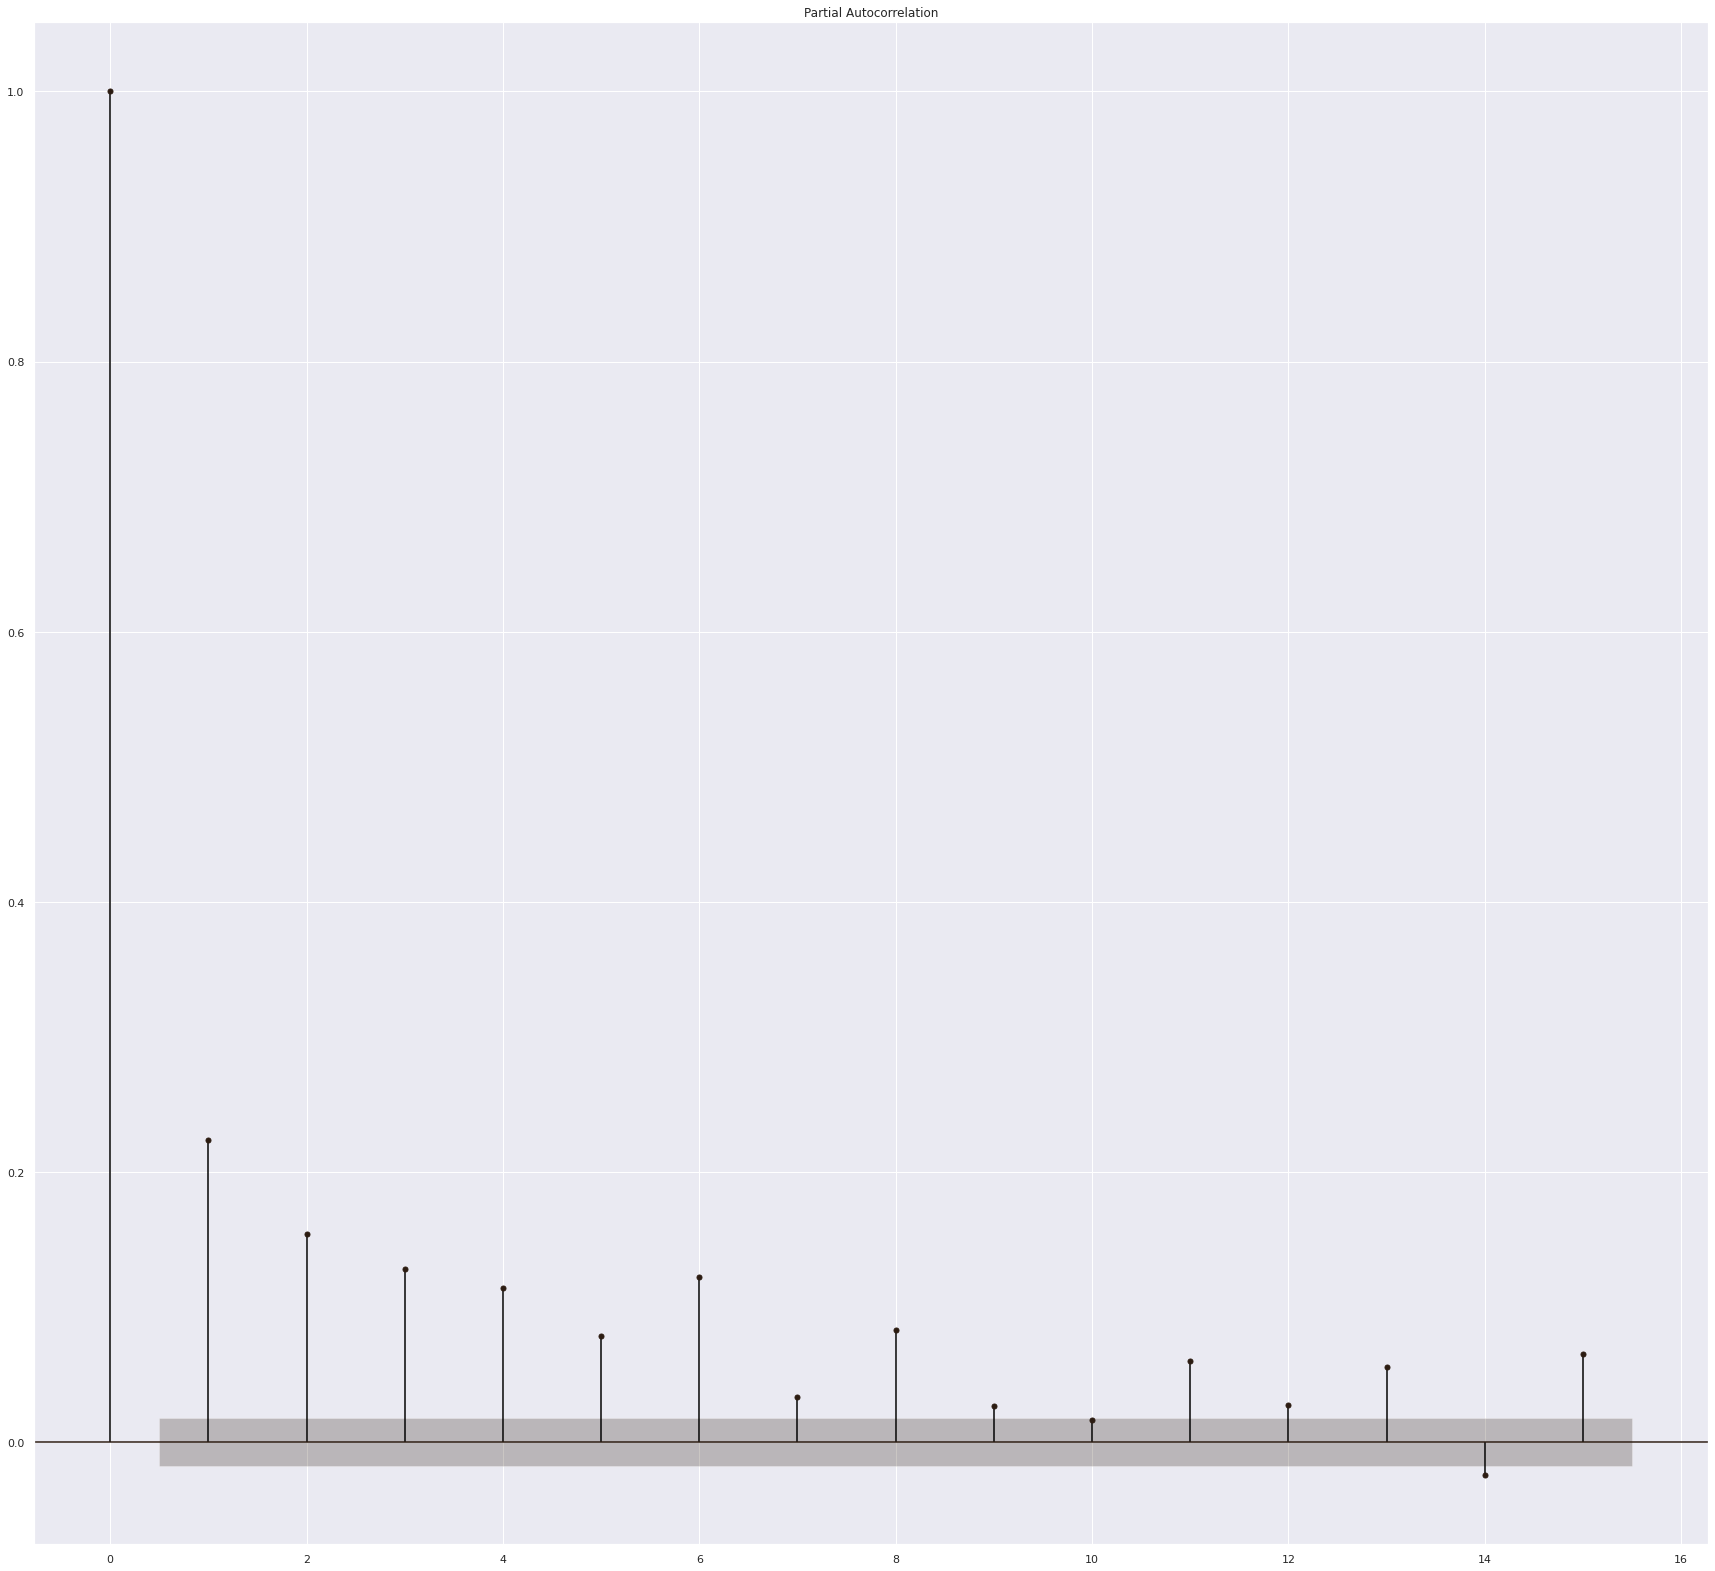

In [35]:
plt.figure(figsize=(10,4))
pacf = smt.graphics.plot_pacf(model1.resid, lags=15, alpha=0.5)
pacf.show()

Here, the graph indicates that there exist autocorrelation, because, some points are outside the level of significance. But to validate our result, we shall use Durbin-Watson test.

#### **(c) Performing Durbin-Watson Test**

>H0 : There is no autocorrelation

>H1 : There is autocorrelation

The value of test statistic :
* Between 2 and 4 : No autocorrelation
* Less than 2 : Positive Autocorrelarion
* More than 4 : Negative Autocorrelation

In [36]:
durbin_watson(model1.resid)

1.5437472580851772

**Conclusion:**
* The value of test statistic is less than 2, hence it can be concluded that there exist positive correlation between the error terms.

In [37]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance
print(c)

[7.22221054e-03 3.94547973e-03 5.44224039e-03 ... 8.04110551e-07
 6.99854767e-04 1.08408002e-02]


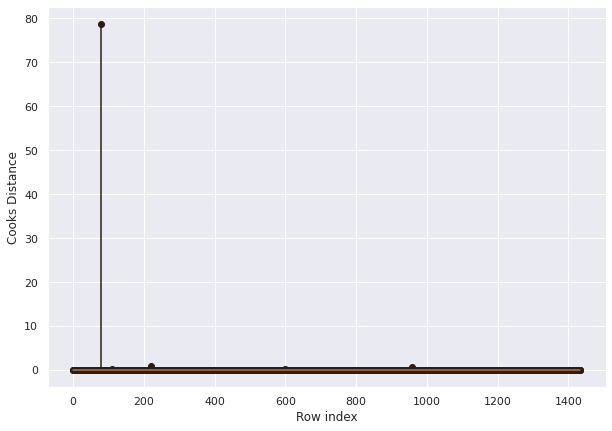

In [38]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(10, 7))
plt.stem(np.arange(len(data)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [39]:
k = data.shape[1] # columns
n = data.shape[0] # rows
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020905923344947737

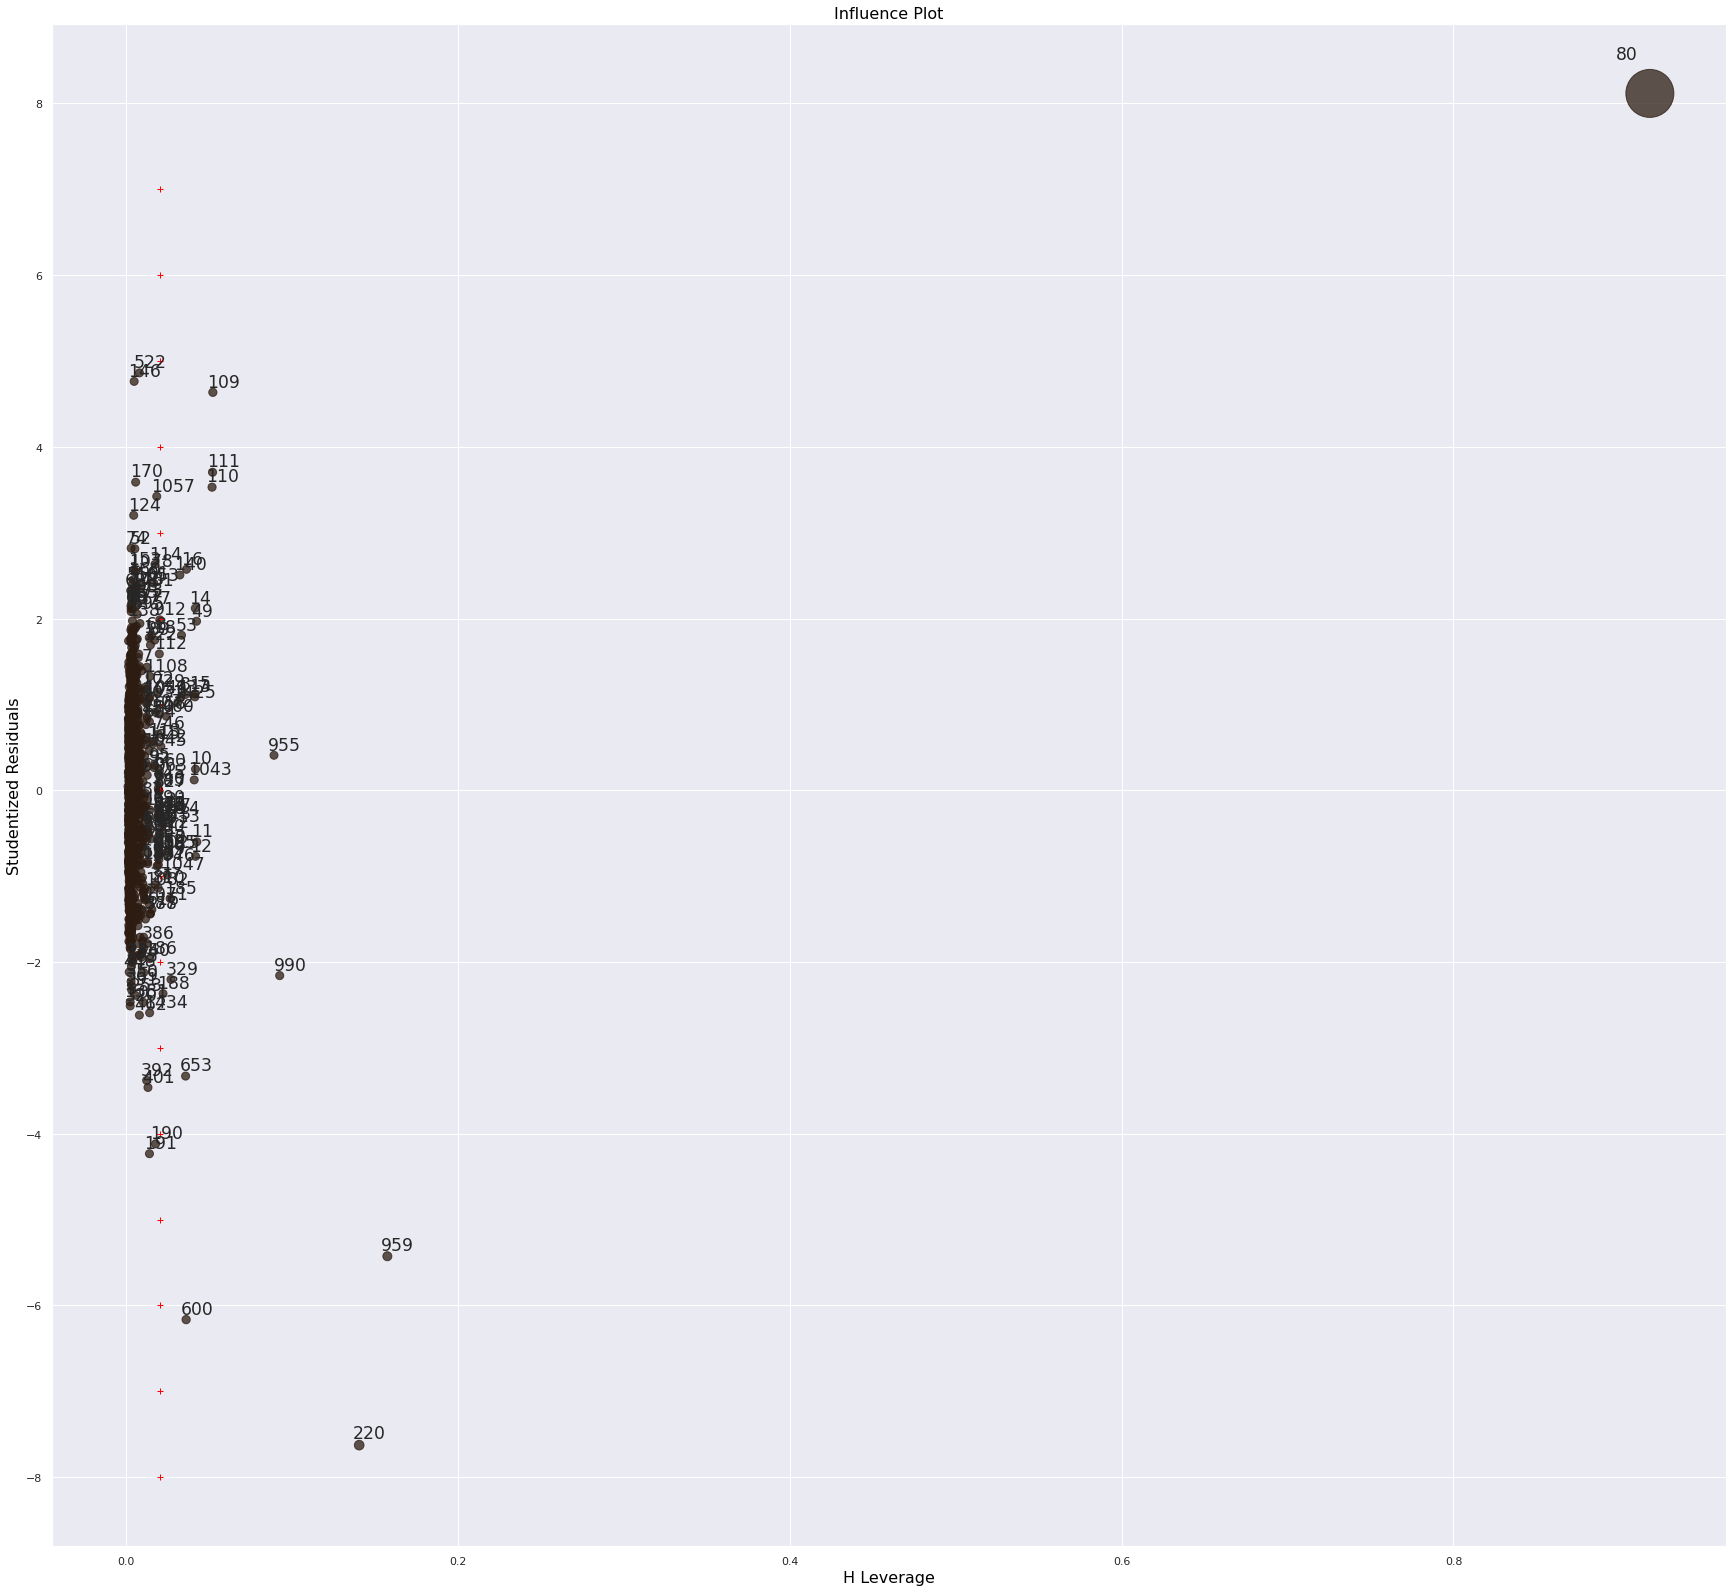

In [40]:
influence_plot(model1,alhpa=0.5)

y=[i for i in range(-8,8)]
x=[leverage_cutoff for i in range(16)]
plt.plot(x,y,'r+')

plt.show()

* Here, Very large values are lying outside the line of significancy, which indicates that there are huge number of datapoints, in the datasets that are acting as outliers. But we cannot remove such huge number of datapoints from the data, and hence we cannot do any changes here.